## 00. Coding Best Practices

In [319]:
##  Basic Libraries ## 

import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

##  Encoding ## 
from sklearn.preprocessing import LabelEncoder

##  Machine Learning ## 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Settings ## 
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', None)

In [320]:
## Basic functions ## 

def data_info(): # improved data.info()
    print(f"The DataFrame shape is {data.shape}.")
    print()
    print("The DataFrame data types are:")
    print(data.dtypes.value_counts().tolist())
    print(data.dtypes.value_counts().index.tolist())
    print()
    print("DataFrame random row sample and full columns:")
    return data.sample(5)

def clean_columns(): # Standardizes the column name, returns the columns
    data_copy.columns = [i.lower().replace(' ', '_') for i in data_copy.columns]
    return data_copy.sample(0)
    
def check_null_cols(): # Checks for empty cells in the entire DataFrame
    null_cols = data_copy.isnull().sum()
    null_cols = null_cols[null_cols > 0]
    print(null_cols)
    
def check_nan_cols(): # Checks for NaN values in the entire DataFrame
    nan_cols = data_copy.isna().sum()
    nan_cols = nan_cols[nan_cols > 0]
    print(nan_cols)
    
def is_significant(column_name, data_copy): # takes a column name
    n_data = len(data_copy)
    n_nulls = data_copy[column_name].isnull().sum() # counts all NaNs of column name
    null_percentage = n_nulls / n_data * 100
    print(f"{null_percentage:.2f}% of the '{column_name}' column are empty.")
    
## Specific functions for this dataset ## 

def convert_value(value): # function to convert value to unified format
    try:
        if isinstance(value, float):
            return value
        elif value.endswith('K'):
            return float(value[1:-1]) * 1000
        elif value.endswith('M'):
            return float(value[1:-1]) * 1000000
        else:
            return float(value)
    except ValueError:
        return None

## 01 - Getting the Data

In [321]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. iron-activity/project-mbappe", "fifa21_male2.csv")
data = pd.read_csv(file_path)
data_info()

The DataFrame shape is (17125, 107).

The DataFrame data types are:
[52, 45, 10]
[dtype('O'), dtype('int64'), dtype('float64')]

DataFrame random row sample and full columns:


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
12093,241670,F. Bradarić,28,69,Croatia,Cagliari,70,CDM,CM CDM,https://cdn.sofifa.com/players/241/670/20_120.png,https://cdn.sofifa.com/teams/1842/light_60.png,https://cdn.sofifa.com/flags/hr.png,69,Cagliari 2018 ~ 2023,"6'1""",170lbs,Right,0,"Aug 7, 2018",NaN,€1M,€15K,€1.7M,2018 ~ 2023,305,60,45,64,77,59.0,312,61,61.0,40,75,75,305,62,53,61.0,62,67.0,324,62,67.0,67,65,63,286,64,64.0,43.0,71.0,44,66.0,212,65,75,72.0,45,7,8,10,11,9,1789,378,3 ★,2★,Low,Medium,1 ★,57,53,69,66,68,65,9,58+2,58+2,58+2,61+0,61+0,61+0,61+0,61+0,65+2,65+2,65+2,63+2,69+0,69+0,69+0,63+2,67+2,70+-1,70+-1,70+-1,67+2,67+2,68+1,68+1,68+1,67+2,15+2,Male
16664,257812,D. Hrezdac,18,53,Romania,UTA Arad,54,CDM,CDM,https://cdn.sofifa.com/players/257/812/20_120.png,https://cdn.sofifa.com/teams/110750/light_60.png,https://cdn.sofifa.com/flags/ro.png,73,UTA Arad 2018 ~ 2024,"6'0""",161lbs,Right,20,"Jul 1, 2018",NaN,€110K,€500,€259K,2018 ~ 2024,195,31,30,44,57,33.0,211,44,35.0,39,45,48,292,60,55,65.0,51,61.0,265,47,60.0,66,58,34,211,45,54.0,39.0,38.0,35,42.0,155,49,54,52.0,52,9,12,10,11,10,1381,294,2 ★,2★,Medium,Medium,1 ★,57,35,44,49,51,58,4,44+2,44+2,44+2,45+0,45+0,45+0,45+0,45+0,46+2,46+2,46+2,46+2,48+2,48+2,48+2,46+2,51+2,52+2,52+2,52+2,51+2,52+2,52+2,52+2,52+2,52+2,15+2,Male
12596,243239,L. González,20,61,Switzerland,FC St. Gallen,63,ST,ST,https://cdn.sofifa.com/players/243/239/20_120.png,https://cdn.sofifa.com/teams/898/light_60.png,https://cdn.sofifa.com/flags/ch.png,75,FC St. Gallen 2020 ~ 2023,"5'7""",161lbs,Right,14,"Jan 24, 2020",NaN,€550K,€2K,€1.1M,2020 ~ 2023,283,57,63,53,56,54.0,278,61,61.0,51,47,58,370,83,76,82.0,56,73.0,307,67,57.0,58,68,57,262,58,41.0,57.0,50.0,56,52.0,66,22,25,19.0,48,6,6,15,10,11,1614,351,3 ★,3★,Medium,Medium,1 ★,79,62,54,63,30,63,5,61+2,61+2,61+2,62+0,60+0,60+0,60+0,62+0,59+2,59+2,59+2,60+2,53+2,53+2,53+2,60+2,48+2,45+2,45+2,45+2,48+2,46+2,42+2,42+2,42+2,46+2,14+2,Male
6129,214907,F. Bahlouli,24,68,France,LOSC Lille,67,CAM,CAM,https://cdn.sofifa.com/players/214/907/20_120.png,https://cdn.sofifa.com/teams/65/light_60.png,https://cdn.sofifa.com/flags/fr.png,74,LOSC Lille 2017 ~ 2020,"6'0""",181lbs,Right,6,"Jan 31, 2017",NaN,€1.2M,€10K,€2.5M,2017 ~ 2020,302,62,58,61,67,54.0,332,75,63.0,55,64,75,331,63,67,72.0,61,68.0,291,74,49.0,42,75,51,300,55,49.0,64.0,66.0,66,69.0,122,29,49,44.0,44,7,10,11,8,8,1722,369,4 ★,4★,High,Low,1 ★,65,60,65,74,44,61,4,65+2,65+2,65+2,67+0,67+0,67+0,67+0,67+0,67+2,67+2,67+2,66+2,63+2,63+2,63+2,66+2,55+2,56+2,56+2,56+2,55+2,54+2,53+2,53+2,53+2,54+2,14+2,Male
17047,258889,Nathan,18,63,Brazil,Boavista FC,63,RB,RB,https://cdn.sofifa.com/players/258/889/20_120.png,https://cdn.sofifa.com/teams/1898/light_60.png,https://cdn.sofifa.com/flags/br.png,77,Boavista FC 2020 ~ 2024,"6'0""",157lbs,Right,14,"Oct 1, 2020",NaN,€700K,€550,€1.9M,2020 ~ 2024,241,65,35,43,58,40.0,269,63,51.0,40,47,68,344,75,74,70.0,66,59.0,237,41,53.0,50,54,39,275,59,60.0,60.0,53.0,43,56.0,175,63,58,54.0,40,8,6,9,6,11,1581,346,3 ★,2★,High,Medium,1 ★,74,39,56,65,58,54,7,53+2,53+2,53+2,61+0,58+0,58+0,58+0,61+0,59+2,59+2,59+2,61+2,57+2,57+2,57+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,58+2,58+2,58+2,61+2,14+2,Male


_____________
The following dataset is a collection of **one-year** 17.125 player information distributed among 107 different columns. The majority of our data types are mostly **numericals** (52 object / 45 integers / 10 floats).

Our **project goal** is to identify players who have the potential to become **the next Mbappé**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we decide to proceed with the following **strategy**:

1. The majority of the data types are **numericals**, so we will work with that to make a Linear Regression model.
2. The **target** for our dataset it will be the `OVA` (overall score) of a player.
3. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

Firstly, to prepare our data for analysis we will remove some numerical columns related to player-potential such as `'attacking'`, `'crossing'` or `'short_passing'` which is already calculated as sums of other columns (e.g `total_stats`, `base_stats`).

We will also convert categorical columns like `'Value'`, `'Wage'`, and `'Release Clause'` to numercial by removing symbols such as € and K.

Also, we will features such as `'height'`, `'weight'`, etc., converting them to the metric system by removing quotation symbols or lbs.
_____________

## 02 - Cleaning the Data

In [322]:
data_copy = data.copy() # as best practices, we do first a copy of our dataframe

In [323]:
clean_columns() # Standardizes the column name from data_copy

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,loan_date_end,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender


### Dealing with Null values

In [324]:
check_null_cols() # Checks for empty cells in the entire DataFrame

club                 23
position            413
club_logo            23
joined               58
loan_date_end     16215
volleys              58
curve                58
agility              58
balance              58
jumping              58
interceptions         7
positioning           7
vision               58
composure           423
sliding_tackle       58
a/w                  89
d/w                  89
dtype: int64


In [325]:
# We get rid of loan_date since it has way too many NaN values
data_copy = data_copy.drop(columns=["loan_date_end"])

In [326]:
is_significant('composure', data_copy)

2.47% of the 'composure' column are empty.


In [327]:
# 2.47% is not significant. We will drop it.
data_copy = data_copy.drop(columns=["composure"])

In [328]:
check_nan_cols()

club               23
position          413
club_logo          23
joined             58
volleys            58
curve              58
agility            58
balance            58
jumping            58
interceptions       7
positioning         7
vision             58
sliding_tackle     58
a/w                89
d/w                89
dtype: int64


In [329]:
is_significant('position', data_copy)

2.41% of the 'position' column are empty.


In [330]:
# 2.41% is not significant. We will drop it.
data_copy = data_copy.drop(columns=["position"])

The features `value`, `wage`, and `'release Clause'` are interesting columns to work with. However, they contain symbols such as € and K, so they need to be converted to numerical values. 

In [331]:
data_check = data_copy[['value', 'wage', 'release_clause']]
data_check.head(10)

,value,wage,release_clause
0,€625K,€7K,€0
1,€600K,€7K,€1.1M
2,€1.1M,€15K,€0
3,€0,€0,€0
4,€5.5M,€12K,€7.2M
5,€725K,€5K,€0
6,€2.8M,€44K,€5.3M
7,€1K,€60K,€0
8,€0,€0,€0
9,€400K,€40K,€0


In [332]:
# We will use convert_value function to convert value to unified format
data_copy['value'] = data_copy['value'].apply(convert_value) # Applying the function
data_copy['wage'] = data_copy['wage'].apply(convert_value)
data_copy['release_clause'] = data_copy['release_clause'].apply(convert_value)
# Visualizing the changes
data_checkmate = data_copy[['value', 'wage', 'release_clause']] 
data_comparision = pd.concat([data_check, data_checkmate], axis=1) # merging to compare the changes
data_comparision.head(10)

,value,wage,release_clause,value,wage,release_clause
0,€625K,€7K,€0,625000.0,7000.0,NaN
1,€600K,€7K,€1.1M,600000.0,7000.0,1100000.0
2,€1.1M,€15K,€0,1100000.0,15000.0,NaN
3,€0,€0,€0,NaN,NaN,NaN
4,€5.5M,€12K,€7.2M,5500000.0,12000.0,7200000.0
5,€725K,€5K,€0,725000.0,5000.0,NaN
6,€2.8M,€44K,€5.3M,2800000.0,44000.0,5300000.0
7,€1K,€60K,€0,1000.0,60000.0,NaN
8,€0,€0,€0,NaN,NaN,NaN
9,€400K,€40K,€0,400000.0,40000.0,NaN


### Encoding
* Some columns considered as **categoricals** are actually **numericals**
* e.g: `height`, `weight`, etc.

In [333]:
# Convert height data from feet and inches to centimeters
data_copy['h_cm'] = data_copy['height'].apply(lambda x: int(x.split("'")[0])*30.48 + int(x.split("'")[1].replace('"', ''))*2.54)
# Convert weight data from pounds to kilograms
data_copy['w_kg'] = data_copy['weight'].apply(lambda x: int(x[:-3]) / 2.2046)
# Modify cells with 'K' character, leave others unchanged, turn it to integer
data_copy['hits'] = data_copy['hits'].apply(lambda x: float(x.replace('K','')) * 1000 if isinstance(x, str) and 'K' in x else x).astype(int)

# Applying lambda to:

# weak_foot 
data_copy['w_f'] = data_copy['w/f'].apply(lambda x: int(x[0]))
# skilled_moves
data_copy['sm'] = data_copy['sm'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# international_reputation
data_copy['ir'] = data_copy['ir'].apply(lambda x: int(x[0]) if isinstance(x, str) else x)

# Visualizing the changes
data_encoded = data_copy[['h_cm', 'w_kg', 'hits', 'w_f', 'sm', 'ir']]
data_encoded.head(5)

,h_cm,w_kg,hits,w_f,sm,ir
0,182.88,82.101061,4,3,2,2
1,177.80,64.864374,4,4,3,1
2,175.26,73.029121,11,4,4,2
3,180.34,74.843509,3,3,1,1
4,170.18,68.039554,149,4,4,4


### Further Encoding

In [334]:
data_f_encoding = data_copy[['a/w', 'd/w']]
data_f_encoding.head(5)

,a/w,d/w
0,Medium,High
1,Medium,Medium
2,Medium,Low
3,NaN,NaN
4,High,Medium


In [335]:
# Initialize the LabelEncoder object
le = LabelEncoder()

# Fit and transform the data frame column
data_copy['a_wr'] = le.fit_transform(data_copy['a/w'])
data_copy['d_wr'] = le.fit_transform(data_copy['d/w'])

# Visualizing the changes
data_encoded_f = data_copy[['a_wr', 'd_wr']]
data_comparision_2 = pd.concat([data_f_encoding, data_encoded_f], axis=1)
data_comparision_2.head(5)

,a/w,d/w,a_wr,d_wr
0,Medium,High,2,0
1,Medium,Medium,2,2
2,Medium,Low,2,1
3,NaN,NaN,3,3
4,High,Medium,0,2


### Selecting numericals

In [336]:
# Create a new dataframe with only the numerical columns using select_dtypes
X_N = data_copy.select_dtypes(np.number).fillna(0) # we also deal with NaN values
X_N.head(10)

,id,age,ova,bov,pot,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,sm,ir,pac,sho,pas,dri,def,phy,hits,h_cm,w_kg,w_f,a_wr,d_wr
0,2,33,69,71,69,0,625000.0,7000.0,0.0,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,208,70,69,69.0,56,14,5,15,10,12,1929,408,2,2,71,59,70,71,68,69,4,182.88,82.101061,3,2,0
1,16,37,71,70,71,0,600000.0,7000.0,1100000.0,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,153,70,43,40.0,56,9,12,13,11,11,1906,385,3,1,53,69,73,69,58,63,4,177.80,64.864374,4,2,2
2,27,33,71,71,71,0,1100000.0,15000.0,0.0,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,99,35,34,30.0,51,9,6,13,16,7,1770,354,4,2,45,68,76,77,36,52,11,175.26,73.029121,4,2,1
3,36,36,68,70,82,14,0.0,0.0,0.0,264,54,70,60,80,0.0,255,68,0.0,46,64,77,176,59,62,0.0,55,0.0,239,63,0.0,51,66,59,271,59,70.0,72.0,0.0,70,75,34,41,0.0,68,5,21,64,21,21,1348,369,1,1,61,66,66,69,47,60,3,180.34,74.843509,3,3,3
4,41,36,81,82,81,0,5500000.0,12000.0,7200000.0,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,181,68,57,56.0,45,6,13,6,13,7,2014,420,4,4,58,70,85,85,63,59,149,170.18,68.039554,4,0,2
5,61,27,66,66,70,4,725000.0,5000.0,0.0,271,61,53,42,58,57.0,276,67,61.0,42,44,62,406,90,91,75.0,65,85.0,315,71,70.0,64,61,49,256,63,26.0,63.0,58.0,46,79,22,26,31.0,46,8,13,7,9,9,1649,360,3,2,91,56,56,67,27,63,7,172.72,73.936315,2,2,2
6,80,38,77,77,77,0,2800000.0,44000.0,5300000.0,342,80,66,43,84,69.0,406,77,83.0,80,85,81,308,54,36,67.0,70,81.0,340,77,72.0,51,64,76,384,87,62.0,65.0,85.0,85,190,65,65,60.0,47,7,11,7,14,8,2017,403,4,2,44,71,83,77,62,66,7,170.18,72.121927,4,2,2
7,241,39,78,78,78,0,1000.0,60000.0,0.0,380,90,70,60,85,75.0,402,77,87.0,78,81,79,337,59,60,72.0,76,70.0,310,71,59.0,48,61,71,358,60,47.0,78.0,83.0,90,120,26,43,51.0,32,10,5,7,5,5,1939,392,3,3,60,72,85,77,41,57,9,177.80,71.214733,2,2,2
8,244,35,76,78,82,6,0.0,0.0,0.0,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,242,78,81,83.0,43,12,9,5,6,11,1774,378,2,3,67,36,67,53,81,74,4,177.80,78.925882,3,3,3
9,246,37,80,82,80,0,400000.0,40000.0,0.0,394,83,65,72,89,85.0,393,75,74.0,67,90,87,338,53,53,68.0,82,82.0,333,88,64.0,34,63,84,417,87,79.0,83.0,91.0,77,143,58,49,36.0,47,7,12,5,15,8,2065,415,3,2,53,76,87,79,59,61,7,170.18,71.214733,3,2,2


In [337]:
data_headers = list(X_N.columns.values) # to get and check all column names
print("The Column Headers are :", data_headers) 

The Column Headers are : ['id', 'age', 'ova', 'bov', 'pot', 'growth', 'value', 'wage', 'release_clause', 'attacking', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'mentality', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'defending', 'marking', 'standing_tackle', 'sliding_tackle', 'goalkeeping', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'total_stats', 'base_stats', 'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits', 'h_cm', 'w_kg', 'w_f', 'a_wr', 'd_wr']


We then drop the columns that are summarized in other features. 
e.g> 'attacking' = 'crossing' + 'finishing' + 'heading_accuracy' + 'short_passing' + 'volleys'

In [338]:
# We simply move our target overall_scores to the right, for readibility and remove ID
X_N = X_N[['age', 'bov', 'pot', 'growth', 'value', 'wage', 'release_clause', 
           'attacking', 'skill', 'movement', 'power', 'mentality', 'defending', 
           'goalkeeping','total_stats', 'base_stats', 'sm', 'ir','hits', 'h_cm', 
           'w_kg', 'w_f', 'a_wr', 'd_wr', 'ova']]
X_N.shape

(17125, 25)

**Now**, we have a cleaned dataset with `17.125` numerical player information in `25` distinct numerical features.

In [339]:
X_N.sample(5)

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,ir,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
10799,21,70,75,8,1100000.0,5000.0,1900000.0,287,326,315,351,310,197,42,1828,389,3,1,11,185.42,79.833076,3,0,0,67
8813,20,68,75,7,1200000.0,8000.0,0.0,318,316,356,303,258,56,55,1662,352,3,1,3,175.26,74.843509,3,2,2,68
2875,29,75,75,0,5500000.0,14000.0,10500000.0,251,257,291,294,271,228,59,1651,347,2,1,22,185.42,82.101061,3,2,0,75
3212,35,67,66,0,275000.0,2000.0,399000.0,308,318,332,315,341,169,62,1845,383,3,1,5,175.26,68.039554,3,0,2,66
1359,33,72,72,0,2000000.0,3000.0,2700000.0,343,309,292,352,284,103,50,1733,357,3,1,3,180.34,81.193867,4,0,1,72


## 03 - Exploratory Data Analysis

In [340]:
X_N.describe() # basic statistics for all numerical values

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,ir,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
count,17125.000000,17125.000000,17125.000000,17125.000000,1.712500e+04,17125.000000,1.712500e+04,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,67.900204,72.489810,5.524788,2.567377e+06,10436.963504,4.574445e+06,258.537752,266.607591,322.693664,302.414774,261.922803,141.469898,77.609693,1631.256175,361.372146,2.452496,1.152234,36.369285,181.222956,75.142367,2.985927,1.354978,1.548088,66.965022
std,4.942665,6.637538,5.769949,5.787539,5.372622e+06,21191.481943,1.033846e+07,72.255687,76.809344,54.933593,49.380576,62.913935,61.595180,81.136603,260.357024,40.252290,0.781285,0.461311,166.898102,6.886553,7.175081,0.672551,0.916545,0.781324,6.864329
min,16.000000,42.000000,47.000000,-1.000000,0.000000e+00,0.000000,0.000000e+00,33.000000,43.000000,113.000000,128.000000,50.000000,17.000000,5.000000,731.000000,228.000000,1.000000,1.000000,3.000000,154.940000,49.895673,1.000000,0.000000,0.000000,38.000000
25%,21.000000,64.000000,69.000000,0.000000,3.750000e+05,1000.000000,5.080000e+05,232.000000,232.000000,294.000000,272.000000,235.000000,84.000000,48.000000,1492.000000,333.000000,2.000000,1.000000,4.000000,175.260000,69.853942,3.000000,0.000000,1.000000,62.000000
50%,25.000000,68.000000,72.000000,4.000000,8.000000e+05,3000.000000,1.300000e+06,271.000000,279.000000,331.000000,308.000000,269.000000,158.000000,53.000000,1659.000000,362.000000,2.000000,1.000000,7.000000,180.340000,74.843509,3.000000,2.000000,2.000000,67.000000
75%,29.000000,72.000000,76.000000,9.000000,2.400000e+06,11000.000000,3.900000e+06,306.000000,319.000000,360.000000,339.000000,304.000000,194.000000,59.000000,1812.000000,390.000000,3.000000,1.000000,18.000000,185.420000,79.833076,3.000000,2.000000,2.000000,72.000000
max,53.000000,93.000000,95.000000,26.000000,1.055000e+08,560000.000000,2.031000e+08,437.000000,470.000000,464.000000,444.000000,421.000000,272.000000,440.000000,2316.000000,498.000000,5.000000,5.000000,9200.000000,205.740000,110.224077,5.000000,3.000000,3.000000,93.000000


In [341]:
## TO CORRECT... To learn... How to deal with Outliers??? ##
## I have 64 features, how can I easily check them? ##

In [342]:
# Looking at Overall Score Plaer with rating >80
mvps = data_copy[(data_copy['ova'] > 80)]

# Sort the MVPs
mvps_sorted = mvps.sort_values('ova', ascending=False)
mvps_sorted.head(5)

,id,name,age,ova,nationality,club,bov,bp,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr
752,158023,L. Messi,33,93,Argentina,FC Barcelona,93,RW,https://cdn.sofifa.com/players/158/023/20_120.png,https://cdn.sofifa.com/teams/241/light_60.png,https://cdn.sofifa.com/flags/ar.png,93,FC Barcelona 2004 ~ 2021,"5'7""",159lbs,Left,0,"Jul 1, 2004",67500000.0,560000.0,138400000.0,2004 ~ 2021,429,85,95,70,91,88.0,470,96,93.0,94,91,96,451,91,80,91.0,94,95.0,389,86,68.0,72,69,94,347,44,40.0,93.0,95.0,75,91,32,35,24.0,54,6,11,15,14,8,2231,466,4 ★,4,Medium,Low,5,85,92,91,95,38,65,830,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3,Male,170.18,72.121927,4,2,1
142,20801,Cristiano Ronaldo,35,92,Portugal,Juventus,92,ST,https://cdn.sofifa.com/players/020/801/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,https://cdn.sofifa.com/flags/pt.png,92,Juventus 2018 ~ 2022,"6'2""",183lbs,Right,0,"Jul 10, 2018",46000000.0,220000.0,75900000.0,2018 ~ 2022,437,84,95,90,82,86.0,414,88,81.0,76,77,92,431,87,91,87.0,95,71.0,444,94,95.0,84,78,93,353,63,29.0,95.0,82.0,84,84,28,32,24.0,58,7,11,15,14,11,2221,464,4 ★,5,High,Low,5,89,93,81,89,35,77,750,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3,Male,187.96,83.008255,4,0,1
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,https://cdn.sofifa.com/players/188/545/20_120.png,https://cdn.sofifa.com/teams/21/light_60.png,https://cdn.sofifa.com/flags/pl.png,91,FC Bayern München 2014 ~ 2023,"6'0""",176lbs,Right,0,"Jul 1, 2014",80000000.0,240000.0,132000000.0,2014 ~ 2023,423,71,94,85,84,89.0,407,85,79.0,85,70,88,407,77,78,77.0,93,82.0,420,89,84.0,76,86,85,391,81,49.0,94.0,79.0,88,96,35,42,19.0,51,15,6,12,8,10,2195,457,4 ★,4,High,Medium,4,78,91,78,85,43,82,487,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,Male,182.88,79.833076,4,0,2
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,https://cdn.sofifa.com/players/190/871/20_120.png,https://cdn.sofifa.com/teams/73/light_60.png,https://cdn.sofifa.com/flags/br.png,91,Paris Saint-Germain 2017 ~ 2022,"5'9""",150lbs,Right,0,"Aug 3, 2017",90000000.0,270000.0,166500000.0,2017 ~ 2022,408,85,87,62,87,87.0,448,95,88.0,89,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,84,356,51,36.0,87.0,90.0,92,94,35,30,29.0,59,9,9,15,15,11,2175,451,5 ★,5,High,Medium,5,91,85,86,94,36,59,546,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3,Male,175.26,68.039554,5,0,2
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,https://cdn.sofifa.com/players/192/985/20_120.png,https://cdn.sofifa.com/teams/10/light_60.png,https://cdn.sofifa.com/flags/be.png,91,Manchester City 2015 ~ 2023,"5'11""",154lbs,Right,0,"Aug 30, 2015",87000000.0,370000.0,161000000.0,2015 ~ 2023,407,94,82,55,94,82.0,441,88,85.0,83,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,91,408,76,66.0,88.0,94.0,84,186,68,65,53.0,56,15,13,5,10,13,2304,485,5 ★,4,High,High,4,76,86,93,88,64,78,406,83+3,83+3,83+3,88+0,88+0,88+0,88+0,88+0,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3

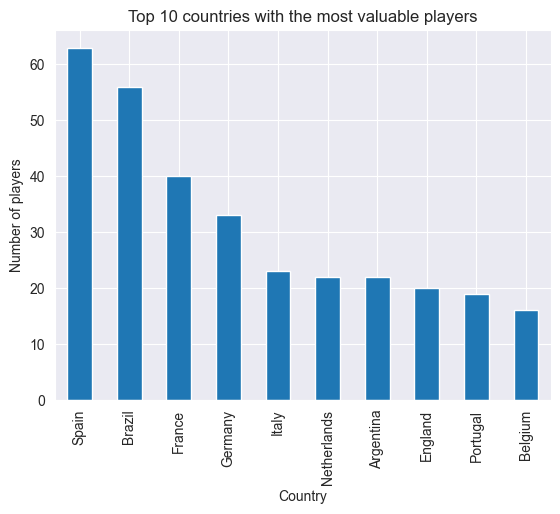

In [343]:
# Group the data by country and count the number of players in each country
mvps_by_country = mvps.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
mvps_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most valuable players')

# Display the chart
plt.show()

In [344]:
# Looking at promising talents
data_copy['pot_minus_ova'] = data_copy['pot'] - data_copy['ova'] 

# Create a new DataFrame that contains only the rows with "difference" > 10 and age < 21
talents = data_copy[(data_copy['pot_minus_ova'] > 10) & (data_copy['age'] < 21)]
talents_sorted = talents.sort_values('pot_minus_ova', ascending=False)
talents_sorted.head(3)

,id,name,age,ova,nationality,club,bov,bp,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
16660,257793,R. Richards,16,54,England,West Bromwich Albion,55,LM,https://cdn.sofifa.com/players/257/793/20_120.png,https://cdn.sofifa.com/teams/109/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,80,West Bromwich Albion 2020 ~ 2023,"5'10""",150lbs,Left,26,"Aug 4, 2020",150000.0,1000.0,450000.0,2020 ~ 2023,220,52,40,37,50,41.0,248,59,47.0,41,43,58,313,72,64,62.0,43,72.0,251,53,51.0,54,45,48,194,33,16.0,39.0,55.0,51,84,22,29,33.0,43,10,8,8,8,9,1353,293,3 ★,2,Medium,Medium,1,68,45,50,59,26,45,83,48+2,48+2,48+2,53+0,51+0,51+0,51+0,53+0,52+2,52+2,52+2,53+2,47+2,47+2,47+2,53+2,43+2,38+2,38+2,38+2,43+2,41+2,34+2,34+2,34+2,41+2,12+2,Male,177.80,68.039554,3,2,2,26
17112,259074,A. Hajdari,17,53,Switzerland,FC Basel 1893,55,CB,https://cdn.sofifa.com/players/259/074/20_120.png,https://cdn.sofifa.com/teams/896/light_60.png,https://cdn.sofifa.com/flags/ch.png,79,FC Basel 1893 2020 ~ 2024,"6'2""",176lbs,Left,26,"Sep 14, 2020",120000.0,NaN,300000.0,2020 ~ 2024,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,157,47,58,52.0,46,12,9,9,11,5,1207,259,3 ★,2,Low,Medium,1,60,25,30,29,53,62,37,36+2,36+2,36+2,32+0,32+0,32+0,32+0,32+0,31+2,31+2,31+2,34+2,33+2,33+2,33+2,34+2,45+2,44+2,44+2,44+2,45+2,48+2,53+2,53+2,53+2,48+2,14+2,Male,187.96,79.833076,3,1,2,26
16812,258315,B. Arrey-Mbi,17,60,Germany,Bayern München II,62,CB,https://cdn.sofifa.com/players/258/315/20_120.png,https://cdn.sofifa.com/teams/110679/light_60.png,https://cdn.sofifa.com/flags/de.png,86,Bayern München II 2020 ~ 2022,"6'2""",168lbs,Left,26,"Jul 1, 2020",425000.0,NaN,1000000.0,2020 ~ 2022,204,34,25,59,56,30.0,207,49,31.0,29,44,54,324,66,70,68.0,52,68.0,273,38,78.0,62,71,24,228,63,53.0,35.0,44.0,33,180,55,64,61.0,50,13,9,8,12,8,1466,322,3 ★,2,Medium,Medium,1,68,29,45,54,58,68,720,46+2,46+2,46+2,47+0,46+0,46+0,46+0,47+0,48+2,48+2,48+2,49+2,49+2,49+2,49+2,49+2,55+2,56+2,56+2,56+2,55+2,57+2,60+2,60+2,60+2,57+2,15+2,Male,187.96,76.204300,3,2,2,26


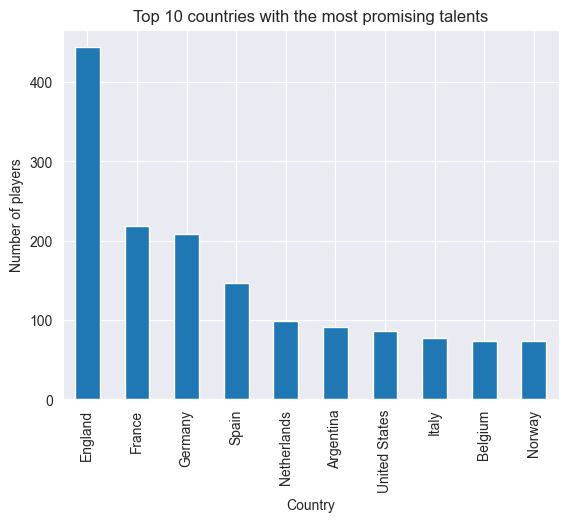

In [345]:
# Group the data by country and count the number of players in each country
talents_by_country = talents.groupby('nationality')['name'].count().sort_values(ascending=False)

# Plot a bar chart of the top 10 countries with the most players
talents_by_country.head(10).plot(kind='bar')

# Add labels and a title to the chart
plt.xlabel('Country')
plt.ylabel('Number of players')
plt.title('Top 10 countries with the most promising talents')

# Display the chart
plt.show()

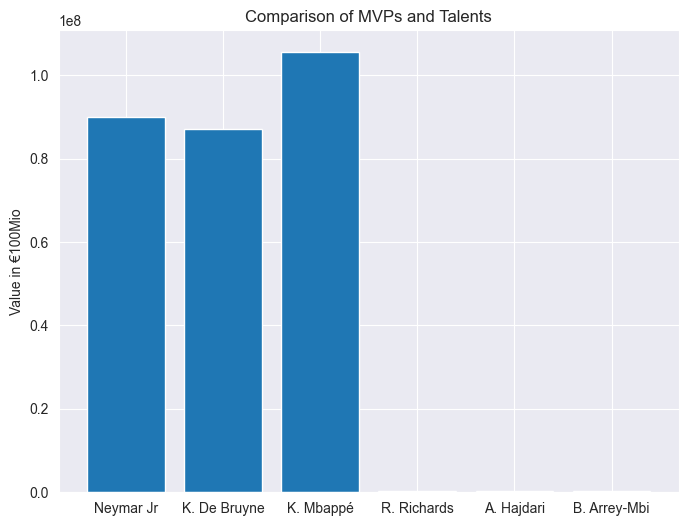

In [346]:
# create a dataframe with 'name' and 'value' columns
df = pd.DataFrame(data_copy, columns=['name', 'value'])

# select the rows for the six specific players you want to plot
players = ['K. Mbappé', 'Neymar Jr', 'K. De Bruyne', 'R. Richards', 'A. Hajdari','B. Arrey-Mbi']
df_players = df[df['name'].isin(players)]

# create a bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(df_players['name'], df_players['value'])
plt.ylabel('Value in €100Mio')
plt.title('Comparison of MVPs and Talents')

# show the chart
plt.show()

## 04 - Processing Data

### Dealing with multicollinearity

In [347]:
# Correlation Matrix
X_N_corr = X_N.corr()
X_N_corr

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,ir,hits,h_cm,w_kg,w_f,a_wr,d_wr,ova
age,1.000000,0.456734,-0.237619,-0.850204,0.095981,0.203035,0.075386,0.183954,0.168876,-0.055642,0.310459,0.272976,0.114796,0.125933,0.280383,0.414897,0.070940,0.403141,-0.082658,0.092935,0.258682,0.081895,-0.034859,-0.126021,0.517099
bov,0.456734,1.000000,0.628323,-0.542890,0.640818,0.595060,0.608384,0.464329,0.473888,0.335011,0.572275,0.523526,0.267770,-0.008702,0.635037,0.830127,0.373599,0.455974,0.250877,0.015950,0.132560,0.212576,-0.174968,-0.164418,0.985877
pot,-0.237619,0.628323,1.000000,0.294499,0.563570,0.462596,0.549201,0.233866,0.265503,0.258243,0.221586,0.243646,0.138748,-0.007277,0.329178,0.474763,0.241020,0.293444,0.347030,-0.021094,-0.039809,0.137861,-0.108610,-0.041560,0.592268
growth,-0.850204,-0.542890,0.294499,1.000000,-0.187347,-0.245185,-0.161274,-0.278316,-0.259171,-0.101046,-0.427168,-0.344307,-0.156108,-0.052589,-0.392559,-0.514210,-0.169399,-0.270221,0.066797,-0.053145,-0.219772,-0.101413,0.094642,0.144231,-0.595585
value,0.095981,0.640818,0.563570,-0.187347,1.000000,0.822432,0.979295,0.289886,0.300469,0.263764,0.329969,0.306257,0.130548,0.002641,0.393043,0.526843,0.278000,0.459631,0.399317,-0.000407,0.040257,0.151324,-0.139784,-0.096183,0.631679
wage,0.203035,0.595060,0.462596,-0.245185,0.822432,1.000000,0.797955,0.290191,0.295327,0.209524,0.319796,0.317885,0.150875,-0.011504,0.381448,0.482043,0.249433,0.537848,0.298740,0.020945,0.069180,0.137961,-0.114755,-0.110343,0.595568
release_clause,0.075386,0.608384,0.549201,-0.161274,0.979295,0.797955,1.000000,0.269036,0.280177,0.248124,0.306773,0.286024,0.127223,0.004279,0.368406,0.497094,0.258140,0.427376,0.409261,0.001362,0.034724,0.141933,-0.132820,-0.089575,0.597617
attacking,0.183954,0.464329,0.233866,-0.278316,0.289886,0.290191,0.269036,1.000000,0.928429,0.694473,0.823755,0.887838,0.313363,-0.768449,0.903393,0.428602,0.767408,0.235135,0.129616,-0.354000,-0.258559,0.355232,-0.330143,-0.184395,0.431238
skill,0.168876,0.473888,0.265503,-0.259171,0.300469,0.295327,0.280177,0.928429,1.000000,0.726893,0.753921,0.884565,0.370467,-0.714045,0.927913,0.502609,0.791591,0.231064,0.138071,-0.455071,-0.355846,0.355696,-0.311543,-0.159902,0.441689
movement,-0.055642,0.335011,0.258243,-0.101046,0.263764,0.209524,0.248124,0.694473,0.726893,1.000000,0.561565,0.610067,0.174809,-0.563847,0.737742,0.450236,0.700903,0.040702,0.149042,-0.632736,-0.537899,0.282964,-0.372742,-0.091877,0.302267


Our matrix shows `NaN` values in `ir` and `w_f`.

After doing some research, we proceed to drop them to visualize a better heatmap.

In [348]:
X_N = X_N.drop(columns=["ir", 'w_f'])

In [349]:
X_N_corr = X_N.corr()
X_N_corr

,age,bov,pot,growth,value,wage,release_clause,attacking,skill,movement,power,mentality,defending,goalkeeping,total_stats,base_stats,sm,hits,h_cm,w_kg,a_wr,d_wr,ova
age,1.000000,0.456734,-0.237619,-0.850204,0.095981,0.203035,0.075386,0.183954,0.168876,-0.055642,0.310459,0.272976,0.114796,0.125933,0.280383,0.414897,0.070940,-0.082658,0.092935,0.258682,-0.034859,-0.126021,0.517099
bov,0.456734,1.000000,0.628323,-0.542890,0.640818,0.595060,0.608384,0.464329,0.473888,0.335011,0.572275,0.523526,0.267770,-0.008702,0.635037,0.830127,0.373599,0.250877,0.015950,0.132560,-0.174968,-0.164418,0.985877
pot,-0.237619,0.628323,1.000000,0.294499,0.563570,0.462596,0.549201,0.233866,0.265503,0.258243,0.221586,0.243646,0.138748,-0.007277,0.329178,0.474763,0.241020,0.347030,-0.021094,-0.039809,-0.108610,-0.041560,0.592268
growth,-0.850204,-0.542890,0.294499,1.000000,-0.187347,-0.245185,-0.161274,-0.278316,-0.259171,-0.101046,-0.427168,-0.344307,-0.156108,-0.052589,-0.392559,-0.514210,-0.169399,0.066797,-0.053145,-0.219772,0.094642,0.144231,-0.595585
value,0.095981,0.640818,0.563570,-0.187347,1.000000,0.822432,0.979295,0.289886,0.300469,0.263764,0.329969,0.306257,0.130548,0.002641,0.393043,0.526843,0.278000,0.399317,-0.000407,0.040257,-0.139784,-0.096183,0.631679
wage,0.203035,0.595060,0.462596,-0.245185,0.822432,1.000000,0.797955,0.290191,0.295327,0.209524,0.319796,0.317885,0.150875,-0.011504,0.381448,0.482043,0.249433,0.298740,0.020945,0.069180,-0.114755,-0.110343,0.595568
release_clause,0.075386,0.608384,0.549201,-0.161274,0.979295,0.797955,1.000000,0.269036,0.280177,0.248124,0.306773,0.286024,0.127223,0.004279,0.368406,0.497094,0.258140,0.409261,0.001362,0.034724,-0.132820,-0.089575,0.597617
attacking,0.183954,0.464329,0.233866,-0.278316,0.289886,0.290191,0.269036,1.000000,0.928429,0.694473,0.823755,0.887838,0.313363,-0.768449,0.903393,0.428602,0.767408,0.129616,-0.354000,-0.258559,-0.330143,-0.184395,0.431238
skill,0.168876,0.473888,0.265503,-0.259171,0.300469,0.295327,0.280177,0.928429,1.000000,0.726893,0.753921,0.884565,0.370467,-0.714045,0.927913,0.502609,0.791591,0.138071,-0.455071,-0.355846,-0.311543,-0.159902,0.441689
movement,-0.055642,0.335011,0.258243,-0.101046,0.263764,0.209524,0.248124,0.694473,0.726893,1.000000,0.561565,0.610067,0.174809,-0.563847,0.737742,0.450236,0.700903,0.149042,-0.632736,-0.537899,-0.372742,-0.091877,0.302267


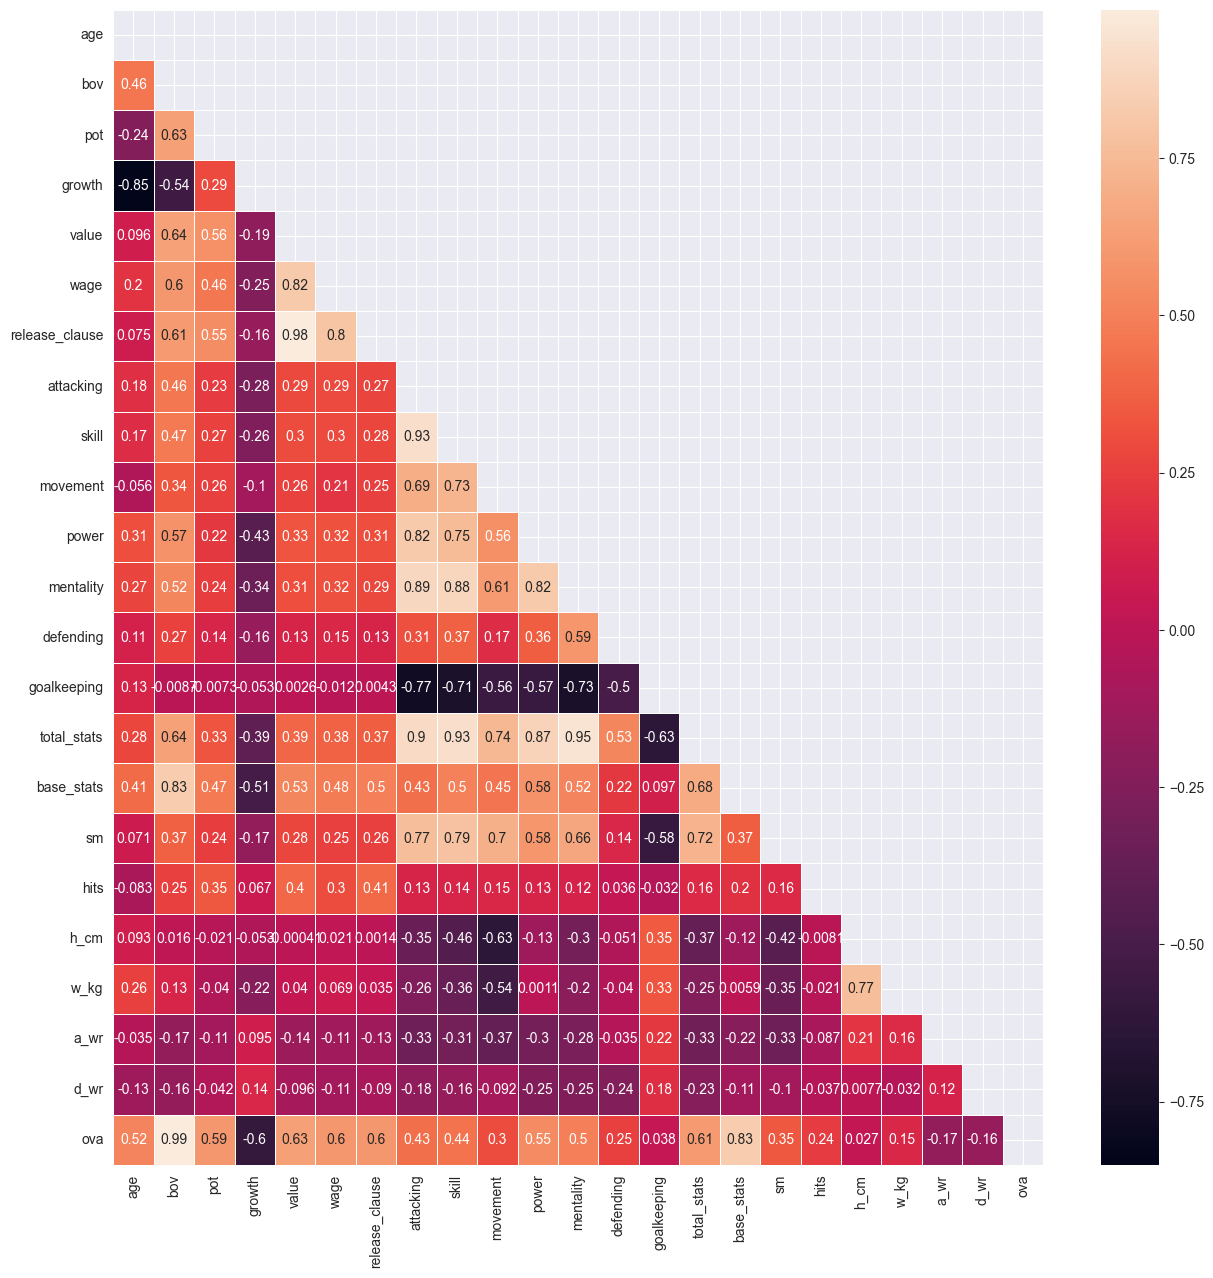

In [350]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_N_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(X_N_corr, mask=mask, annot=True, linewidths=.5, ax=ax)
plt.show()

The variables `'value'` & `'wage'`, share multicollinearity.
Also, `attacking` and `power` have a high coefficent compared to our target, so we proceed to drop them.

In [351]:
X_N = X_N.drop(columns=['value', 'wage', 'attacking', 'power'])

### Normalizing the Data

### X-Y Split

In [352]:
# We do X-Y SPLIT BEFORE normalizing. ~ Xisca. We don't want to normalize the target
Y = X_N['ova']
X_N = X_N.drop(['ova'], axis=1)

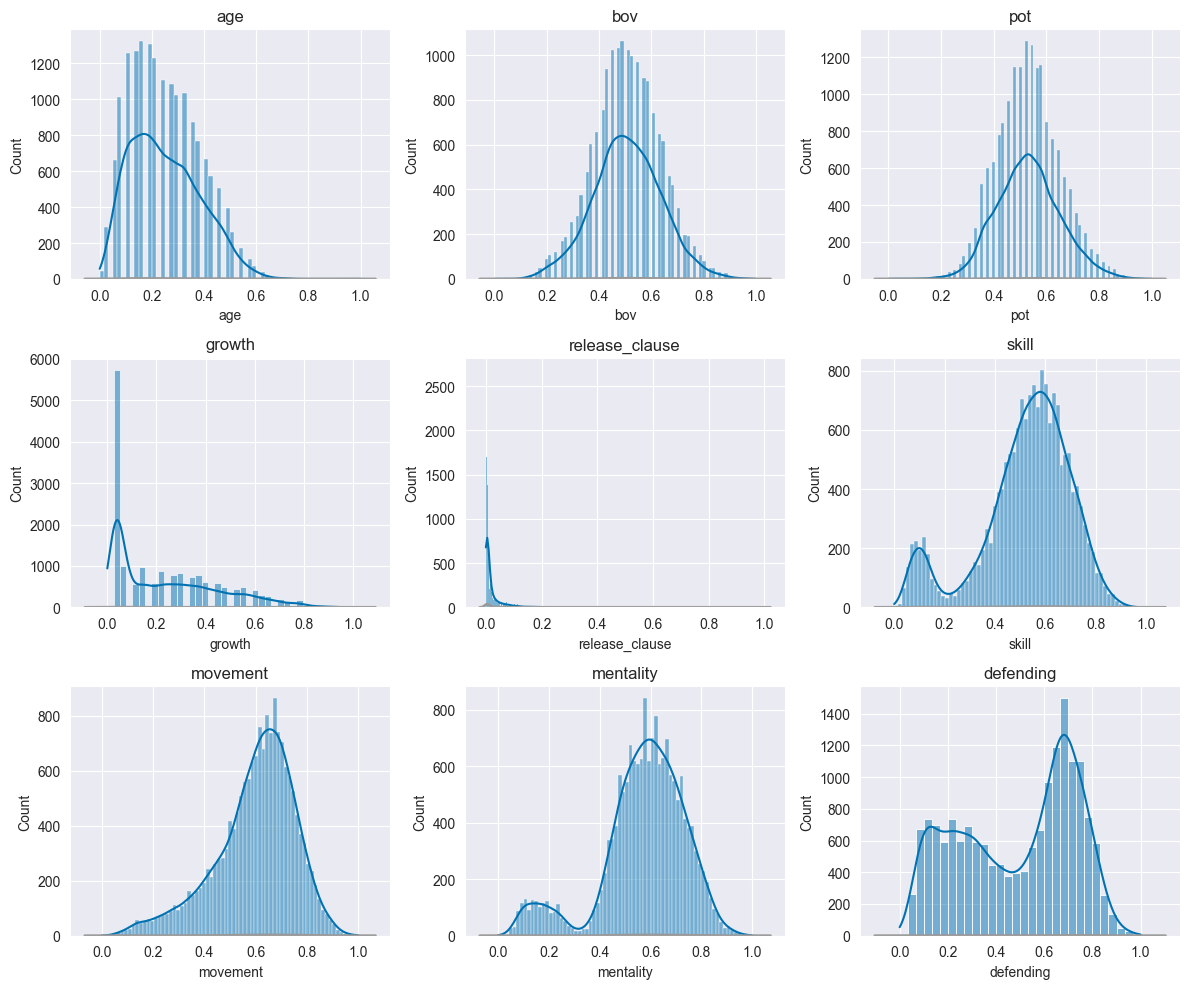

In [353]:
transformer = MinMaxScaler().fit(X_N) # rescale the Data into 0,1 for our model
X_N_minmax = transformer.transform(X_N) 

# create new data frame using data from 'X_N_minmax'
X_N_normalized = pd.DataFrame(X_N_minmax, columns = X_N.columns)

# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    if i >= len(X_N_normalized.columns):
        break
    sns.histplot(X_N_normalized.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(X_N_normalized.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(X_N_normalized.columns[i])
plt.tight_layout()
plt.show()

## 05 - Modeling

### Train-Test Split

In [354]:
# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X_N, Y, test_size=0.3, random_state=42) 
# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [355]:
len(X_N)*0.7 # Len before the test

11987.5

In [356]:
len(X_test) # Len after the test

5138

In [357]:
model = LinearRegression() # We have the model
model.fit(X_train,y_train) # We fit the training data into the model

LinearRegression()

## 06 - Model Validation

In [358]:
predictions = model.predict(X_test)

In [359]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(1.0, 1.1837269792931977e-13, 1.4012095615065982e-26)

In [360]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)

print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  1.0
RMSE =  1.1837269792931977e-13
The value of the metric MSE is  1.4012095615065982e-26
MAE =  7.482272230109035e-14


After the modifications, we probably overfitted the model since R2 is 1.0.
To check: OUTLIERS.

### Present results

In [361]:
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
15195,59,59.0,3.552714e-14
14193,65,65.0,4.263256e-14
16722,62,62.0,3.552714e-14
8037,68,68.0,0.000000e+00
6350,76,76.0,4.263256e-14
...,...,...,...
7576,61,61.0,3.552714e-14
2030,77,77.0,1.421085e-13
11632,65,65.0,1.989520e-13
39,75,75.0,1.421085e-14


In [362]:
results.sort_values('diff', ascending=False).head(10)

,true,pred,diff
9331,90,90.0,1.747935e-12
4166,90,90.0,1.421085e-12
5030,90,90.0,1.364242e-12
9731,81,81.0,1.264766e-12
15004,69,69.0,1.151079e-12
5425,88,88.0,1.108447e-12
5642,87,87.0,1.065814e-12
3402,82,82.0,1.037392e-12
9052,85,85.0,9.521273e-13
6333,88,88.0,8.668621e-13


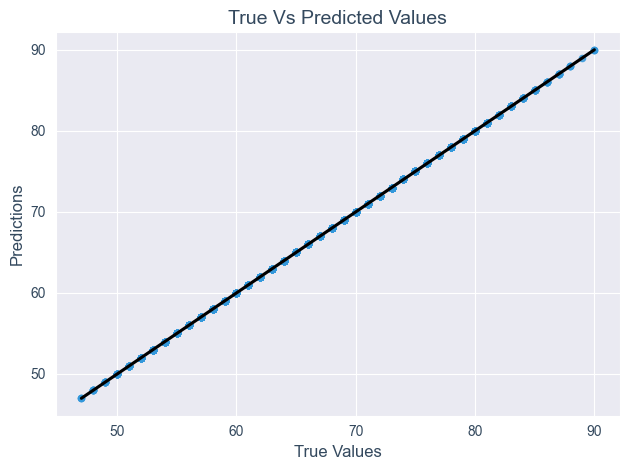

In [363]:
# Create the plot with regression line
sns.set_style('darkgrid')
sns.regplot(x='true', y='pred', data=results, color='black', scatter_kws={'s': 20, 'color': '#3498db'})
plt.xlabel('True Values', fontsize=12, color='#34495e')
plt.ylabel('Predictions', fontsize=12, color='#34495e')
plt.title('True Vs Predicted Values', fontsize=14, color='#34495e')
plt.xticks(fontsize=10, color='#34495e')
plt.yticks(fontsize=10, color='#34495e')
plt.tight_layout()
plt.show()

## 07 - Reporting

In [364]:
X_N.iloc[[0]]

,age,bov,pot,growth,release_clause,skill,movement,mentality,defending,goalkeeping,total_stats,base_stats,sm,hits,h_cm,w_kg,a_wr,d_wr
0,33,71,69,0,0.0,338,347,320,208,56,1929,408,2,4,182.88,82.101061,2,0


In [365]:
results.iloc[[0]]

,true,pred,diff
15195,59,59.0,3.552714e-14


In [366]:
# Creating a new 
names = data_copy.loc[results.index.to_list(), ["id","name"]]
names.head(10)

,id,name
15195,252942,G. Borrelli
14193,248174,N. Boujellab
16722,257995,A. Wahab Ibrahim
8037,226077,A. Gabr
6350,216054,N. Domínguez
10585,236601,S. Tracey
16075,255741,K. Kamiya
6421,216391,Erik
3902,201911,W. Keane
1358,176414,Denilson


In [367]:
# Merging with the results
test = pd.concat([names, results], axis=1)
test.head(10)

,id,name,true,pred,diff
15195,252942,G. Borrelli,59,59.0,3.552714e-14
14193,248174,N. Boujellab,65,65.0,4.263256e-14
16722,257995,A. Wahab Ibrahim,62,62.0,3.552714e-14
8037,226077,A. Gabr,68,68.0,0.000000e+00
6350,216054,N. Domínguez,76,76.0,4.263256e-14
10585,236601,S. Tracey,60,60.0,5.684342e-14
16075,255741,K. Kamiya,56,56.0,2.131628e-14
6421,216391,Erik,73,73.0,0.000000e+00
3902,201911,W. Keane,66,66.0,5.684342e-14
1358,176414,Denilson,72,72.0,1.278977e-13


In [368]:
test[test.name=='C. Baker-Richardson']

,id,name,true,pred,diff


In [369]:
data_copy[data_copy.name=='C. Baker-Richardson']

,id,name,age,ova,nationality,club,bov,bp,player_photo,club_logo,flag_photo,pot,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender,h_cm,w_kg,w_f,a_wr,d_wr,pot_minus_ova
6932,220893,C. Baker-Richardson,23,61,England,Accrington Stanley,62,ST,https://cdn.sofifa.com/players/220/893/20_120.png,https://cdn.sofifa.com/teams/110313/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,68,"Accrington Stanley Jun 30, 2020 On Loan","6'2""",161lbs,Right,7,"Aug 14, 2017",350000.0,1000.0,NaN,"Jun 30, 2020 On Loan",248,28,64,58,51,47.0,195,49,35.0,23,30,58,300,62,69,51.0,58,60.0,279,63,54.0,56,64,42,226,42,16.0,64.0,43.0,61,41,10,17,14.0,58,12,15,8,9,14,1347,292,3 ★,2,Medium,Medium,1,66,58,39,53,19,57,5,60+2,60+2,60+2,54+0,57+0,57+0,57+0,54+0,53+2,53+2,53+2,52+2,46+2,46+2,46+2,52+2,37+2,36+2,36+2,36+2,37+2,36+2,34+2,34+2,34+2,36+2,17+2,Male,187.96,73.029121,3,2,2,7


[Presentation](https://docs.google.com/presentation/d/1Td9rJDfuB_epbsVk1nrdaiT-oH_MAjnKdBoWULncyT0/edit#slide=id.gc6f9e470d_0_126)